In [ ]:
qtconsole

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.animation as anim

In [2]:
%matplotlib inline

In [3]:
plt.style.use('seaborn')

Loading CSV:

In [4]:
names = pd.read_csv('names_nationaldata.csv')

In [5]:
names.head()

,name,sex,number,year
0,Mary,F,54901,1939
1,Barbara,F,37258,1939
2,Patricia,F,29706,1939
3,Betty,F,23641,1939
4,Shirley,F,20445,1939


In [6]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
name      object
sex       object
number    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


# EDA

Total names given per year:

In [ ]:
totalnamesgivenperyear = names.groupby(['year', 'sex'])[['number']].sum()\
                        .reset_index()

In [ ]:
_ = sns.lineplot(x='year', y='number', hue='sex', 
                 data=totalnamesgivenperyear)
plt.show()

In [ ]:
#maybe delete previous graph, not sure it shows anything except population.

Total names listed per year

In [7]:
nameslistedperyear = names.groupby(['year', 'sex'])[['name']].count().reset_index()
nameslistedperyear.head()

,year,sex,name
0,1880,F,942
1,1880,M,1058
2,1881,F,938
3,1881,M,997
4,1882,F,1028


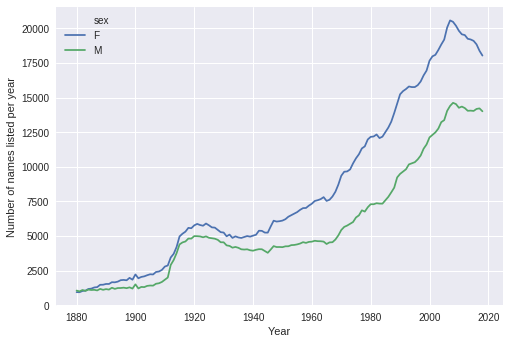

In [8]:
ax2 = sns.lineplot(x='year', y='name', hue='sex', data=nameslistedperyear)
ax2.xaxis.set_label_text('Year')
ax2.yaxis.set_label_text('Number of names listed per year')
plt.show()

New names per year

In [9]:
names.sort_values(['sex', 'year', 'number'], ascending=False).head(10)

,name,sex,number,year
80837,Liam,M,19837,2018
80838,Noah,M,18267,2018
80839,William,M,14516,2018
80840,James,M,13525,2018
80841,Oliver,M,13389,2018
80842,Benjamin,M,13381,2018
80843,Elijah,M,12886,2018
80844,Lucas,M,12585,2018
80845,Mason,M,12435,2018
80846,Logan,M,12352,2018


In [10]:
print(names.year.min())
print(names.year.max())

1880
2018


In [11]:
yearsrange = range(1900,1921)
#range(names.year.min(), names.year.max() + 1)

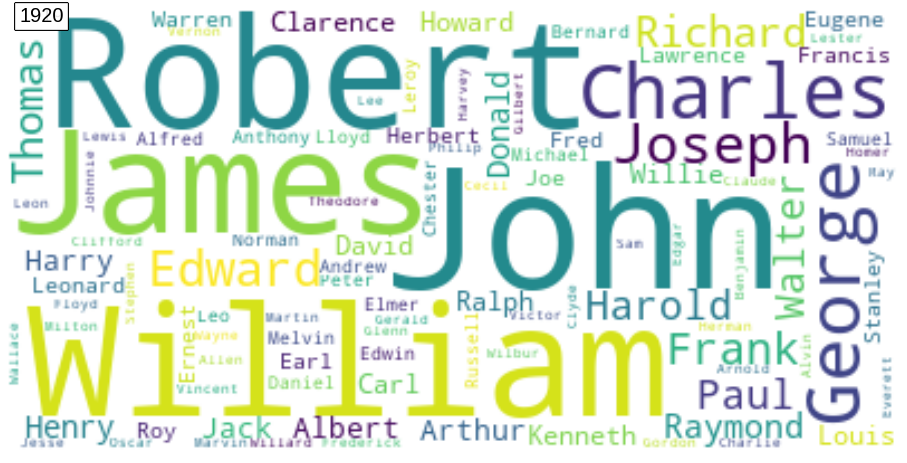

In [12]:
images = []
fig = plt.figure(figsize=(16,9))
_ = plt.axis("off")

for yr in yearsrange:
    tempM = names[['name', 'number']][
        np.logical_and(names.sex=='M', names.year==yr)
    ].sort_values(['number'], ascending=False)
    tempM = tempM.to_numpy()[:100]
    counts = tempM[:,1] / tempM[:,1].min()
    tempM[:,1] = counts.astype(int)
    wordcloud = WordCloud(background_color="white")
    wordcloud = wordcloud.generate_from_frequencies(dict(tempM))
    plt_im = plt.imshow(wordcloud, interpolation="bilinear")
    plt_txt = plt.text(5, 5, str(yr), color='black', fontsize=20, 
                      bbox=dict(facecolor='white', alpha=0.9))
    images.append([plt_im, plt_txt])

In [13]:
animation = anim.ArtistAnimation(fig, images)
animation.save('namesMwcs.gif', writer='imagemagick', fps=1)

Finding names that appeared and disappeared

In [14]:
namesM = names[names.sex=='M'].reset_index(drop=True)
namesM.head()

,name,sex,number,year
0,Robert,M,59645,1939
1,James,M,59627,1939
2,John,M,51015,1939
3,William,M,42077,1939
4,Richard,M,35373,1939


In [15]:
namesM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800519 entries, 0 to 800518
Data columns (total 4 columns):
name      800519 non-null object
sex       800519 non-null object
number    800519 non-null int64
year      800519 non-null int64
dtypes: int64(2), object(2)
memory usage: 24.4+ MB


In [16]:
namesMperYear = namesM.pivot(index='year', columns='name', values='number')
namesMperYear = namesMperYear.replace(to_replace=np.NaN, value=0)

In [17]:
namesMperYear.head()

name,Aaban,Aabid,Aabir,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,...,Zyshonne,Zytaevius,Zytaveon,Zytavion,Zytavious,Zyus,Zyvion,Zyvon,Zyyon,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
1880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
namesMperYear.tail()

name,Aaban,Aabid,Aabir,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,...,Zyshonne,Zytaevius,Zytaveon,Zytavion,Zytavious,Zyus,Zyvion,Zyvon,Zyyon,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
2014,16.0,0.0,0.0,19.0,8.0,18.0,239.0,0.0,25.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
2015,15.0,0.0,0.0,22.0,10.0,15.0,297.0,0.0,31.0,5.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,7.0,0.0,0.0
2016,9.0,5.0,5.0,18.0,0.0,11.0,196.0,0.0,28.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,11.0,0.0,0.0,18.0,8.0,15.0,241.0,7.0,31.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,7.0,6.0,5.0,19.0,0.0,10.0,171.0,0.0,25.0,8.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,5.0


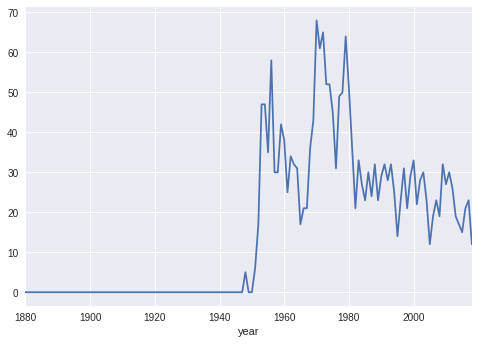

In [19]:
namesMperYear['Desi'].plot()

In [ ]:
namesMperYear['Ricky'].plot()

In [ ]:
namesMperYear['Khal'].plot()

In [ ]:
namesMperYear['Kramer'].plot()

In [ ]:
namesMperYear['Chandler'].plot()

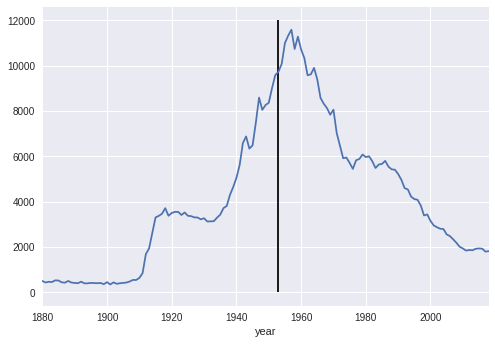

In [21]:
namesMperYear['Peter'].plot()
plt.vlines(1953, 0, 12000)

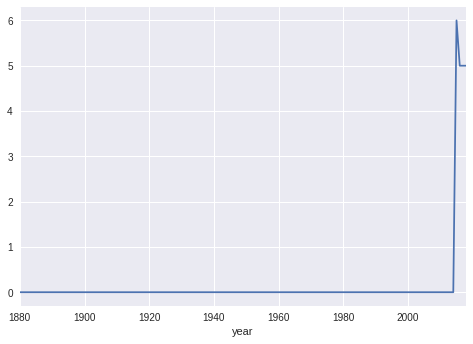

In [30]:
namesMperYear['Mowgli'].plot()

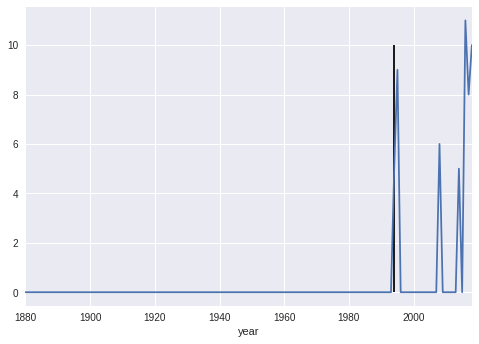

In [43]:
namesMperYear['Simba'].plot()
plt.vlines(1994, 0, 10)

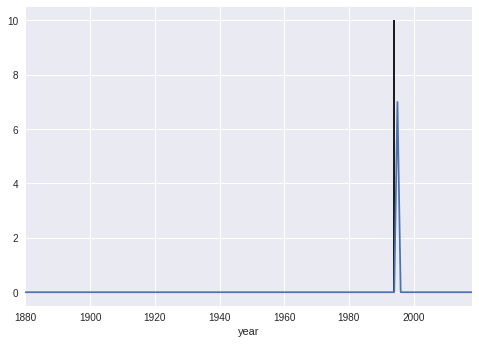

In [44]:
namesMperYear['Mufasa'].plot()
plt.vlines(1994, 0, 10)

In [38]:
dict(namesMperYear['Mufasa'])

{1880: 0.0,
 1881: 0.0,
 1882: 0.0,
 1883: 0.0,
 1884: 0.0,
 1885: 0.0,
 1886: 0.0,
 1887: 0.0,
 1888: 0.0,
 1889: 0.0,
 1890: 0.0,
 1891: 0.0,
 1892: 0.0,
 1893: 0.0,
 1894: 0.0,
 1895: 0.0,
 1896: 0.0,
 1897: 0.0,
 1898: 0.0,
 1899: 0.0,
 1900: 0.0,
 1901: 0.0,
 1902: 0.0,
 1903: 0.0,
 1904: 0.0,
 1905: 0.0,
 1906: 0.0,
 1907: 0.0,
 1908: 0.0,
 1909: 0.0,
 1910: 0.0,
 1911: 0.0,
 1912: 0.0,
 1913: 0.0,
 1914: 0.0,
 1915: 0.0,
 1916: 0.0,
 1917: 0.0,
 1918: 0.0,
 1919: 0.0,
 1920: 0.0,
 1921: 0.0,
 1922: 0.0,
 1923: 0.0,
 1924: 0.0,
 1925: 0.0,
 1926: 0.0,
 1927: 0.0,
 1928: 0.0,
 1929: 0.0,
 1930: 0.0,
 1931: 0.0,
 1932: 0.0,
 1933: 0.0,
 1934: 0.0,
 1935: 0.0,
 1936: 0.0,
 1937: 0.0,
 1938: 0.0,
 1939: 0.0,
 1940: 0.0,
 1941: 0.0,
 1942: 0.0,
 1943: 0.0,
 1944: 0.0,
 1945: 0.0,
 1946: 0.0,
 1947: 0.0,
 1948: 0.0,
 1949: 0.0,
 1950: 0.0,
 1951: 0.0,
 1952: 0.0,
 1953: 0.0,
 1954: 0.0,
 1955: 0.0,
 1956: 0.0,
 1957: 0.0,
 1958: 0.0,
 1959: 0.0,
 1960: 0.0,
 1961: 0.0,
 1962: 0.0,
 196

#### Nombre por año mujeres

In [22]:
namesF = names[names.sex=='F'].reset_index(drop=True)

In [23]:
namesFperYear = namesF.pivot(index='year', columns='name', values='number')
namesFperYear = namesFperYear.replace(to_replace=np.NaN, value=0)

In [ ]:
namesFperYear.head()

In [ ]:
namesFperYear['Esmeralda'].plot()
plt.vlines(1998, 0, 2500)

In [ ]:
namesFperYear['Thelma'].plot()

In [ ]:
namesFperYear['Precious'].plot()

In [ ]:
namesFperYear['Mulan'].plot()

In [ ]:
namesFperYear['Khaleesi'].plot()

In [ ]:
namesFperYear['Ariel'].plot()

In [ ]:
namesFperYear['Daenerys'].plot()

In [ ]:
namesFperYear['Phoebe'].plot()

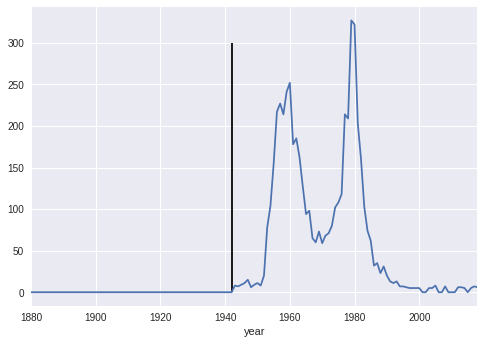

In [25]:
namesFperYear['Bambi'].plot()
plt.vlines(1942, 0, 300)

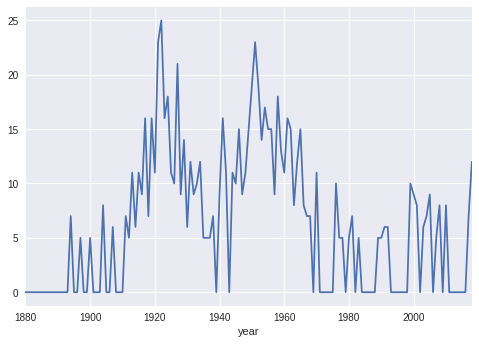

In [27]:
namesFperYear['Cinderella'].plot()

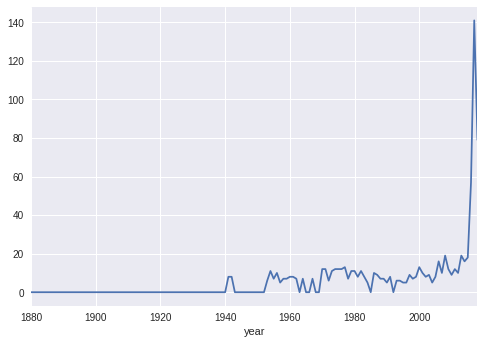

In [32]:
namesFperYear['Moana'].plot()

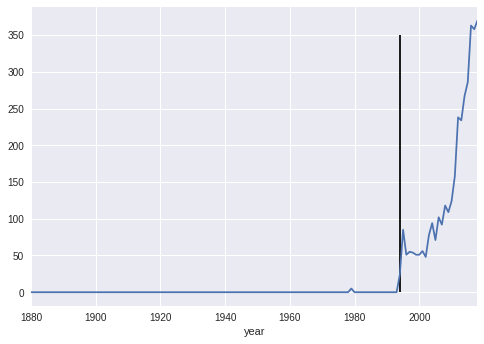

In [35]:
namesFperYear['Nala'].plot()
plt.vlines(1994, 0, 350)

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, 
                      background_color="white").generate(namesF)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
namesF = ''
namesM = ''

In [ ]:
for yr in yearsrange:
    tempF = names[['name', 'number']][np.logical_and(names.year == yr, \
                names.sex=='F')].set_index('name').to_dict()
    tempM = names[['name', 'number']][np.logical_and(names.year == yr, \
                names.sex=='M')].set_index('name').to_dict()
    tempF = tempF['number']
    tempM = tempM['number']
    for k, v in tempF.items():
        namesF += (k+' ')*v
    for k, v in tempM.items():
        namesM += (k+' ')*v

In [ ]:
len(namesF)

In [ ]:
namesperyearF = np.empty(yearsrange, dtype='object')
namesperyearM = np.empty(yearsrange, dtype='object')

In [ ]:
for i, yr in enumerate(range(names.year.min(), names.year.max()+1)):
    namesperyearF[i] = names[['year', 'name']][np.logical_and(names.year == yr, names.sex=='F')].values[:,1]
    namesperyearM[i] = names[['year', 'name']][np.logical_and(names.year == yr, names.sex=='M')].values[:,1]

In [ ]:
namesperyearFchange = np.array([ 
    namesperyearF[i+1].shape[0] - namesperyearF[i].shape[0] for i in range(yearsrange-1)
])
namesperyearMchange = np.array([ 
    namesperyearM[i+1].shape[0] - namesperyearM[i].shape[0] for i in range(yearsrange-1)
])

In [ ]:
_ = plt.plot(namesperyearFchange)
_ = plt.plot(namesperyearMchange)

In [ ]:
names[['year', 'name']][np.logical_and(names.year == 1939, names.sex=='M')].values[:,1]

In [ ]:
names[['year', 'name']][np.logical_and(names.year == 1939, names.sex=='F')].values[:,1].shape

In [ ]:
#names1939 = 
names[['year', 'name']][names.year == 1939].values[:,1]

In [ ]:
names1940 = names[['year', 'name']][names.year == 1940].values[:,1]

In [ ]:
print(names1939.shape)
print(names1940.shape)

In [ ]:
len(list(set(names1940)))